# News Sentiment Analysis

News articles shape our perception of the world, but have you ever wondered how the sentiment of these articles varies across different sources and authors?.This project analyzes news articles and predicts their sentiment (positive, negative, or neutral). It uses a dataset of news articles and their corresponding sentiment labels. The project involves the following steps:

    *Data cleaning: Handle missing values and duplicates.
    Exploratory data analysis: Visualize sentiment distribution, source sentiment, sentiment by author, and text length.
    Text preprocessing: Perform stemming and remove stop words to prepare the text data for modeling.
    Model training: Train various machine learning models, including Logistic Regression, Random Forest, SVM, KNN, Decision Tree, AdaBoost, Gradient Boosting, XGBoost, and MLP Classifier, to classify the sentiment of news articles.
    Evaluation: Evaluate the performance of different models using metrics like accuracy and confusion matrix.
    Deployment: Save the trained model using pickle for future use.
    This project can be used to understand public opinion on various topics, track brand reputation, and analyze news trends.*
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\sofronics\Datasets\news_sentiment_analysis.csv", encoding='latin1')


In [3]:
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE  Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe  Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        3500 non-null   object
 1   Author        2512 non-null   object
 2   Title         3500 non-null   object
 3   Description   3500 non-null   object
 4   URL           3500 non-null   object
 5   Published At  3500 non-null   object
 6   Sentiment     3500 non-null   object
 7   Type          3500 non-null   object
dtypes: object(8)
memory usage: 218.9+ KB


In [5]:
df.describe()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
count,3500,2512,3500,3500,3500,3500,3500,3500
unique,503,816,2336,2377,2669,2196,3,7
top,4-traders,MarketBeat News,Weve created medical refugees. LGBTQ+ healt...,Yearly surveys of first-year medical students ...,https://phys.org/news/2024-07-power-nanopores-...,2024-07-18T18:59:06+00:00,positive,Business
freq,311,272,42,42,6,42,2134,500


In [6]:
df.isnull().sum()

Source            0
Author          988
Title             0
Description       0
URL               0
Published At      0
Sentiment         0
Type              0
dtype: int64

In [7]:
df.duplicated().sum()

737

In [8]:
df.dropna(axis=0,inplace=True)
df = df.drop_duplicates()

In [9]:
df.dtypes


Source          object
Author          object
Title           object
Description     object
URL             object
Published At    object
Sentiment       object
Type            object
dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
df['Published At']=pd.to_datetime(df['Published At'])

In [12]:
df.tail()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
2794,americanbankingnews,ABMN Staff,"QRG Capital Management Inc. Purchases 1,677 Sh...","QRG Capital Management Inc. Purchases 1,677 Sh...",https://www.americanbankingnews.com/2024/07/18...,2024-07-18 14:36:45+00:00,neutral,Technology
2795,etfdailynews,MarketBeat News,"Arrow Electronics, Inc. (NYSE:ARW) Shares Purc...",QRG Capital Management Inc. increased its stak...,https://www.etfdailynews.com/2024/07/18/arrow-...,2024-07-18 14:36:45+00:00,positive,Technology
2796,etfdailynews,MarketBeat News,"3,120 Shares in NICE Ltd. (NASDAQ:NICE) Bought...",QRG Capital Management Inc. bought a new posit...,https://www.etfdailynews.com/2024/07/18/3120-s...,2024-07-18 14:36:44+00:00,positive,Technology
2797,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Has $857,000 Stock...",QRG Capital Management Inc. boosted its stake ...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18 14:36:43+00:00,positive,Technology
2799,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Sells 1,665 Shares...",QRG Capital Management Inc. reduced its holdin...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18 14:32:46+00:00,positive,Technology


### SENTIMENT DISTRIBUTION

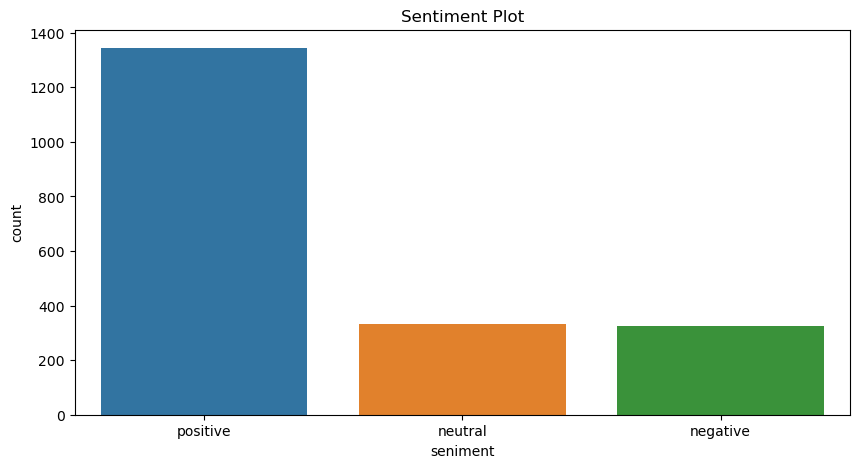

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment',data=df)
plt.title('Sentiment Plot')
plt.xlabel('seniment')
plt.ylabel('count')
plt.show()

### SOURCE SENTIMENT

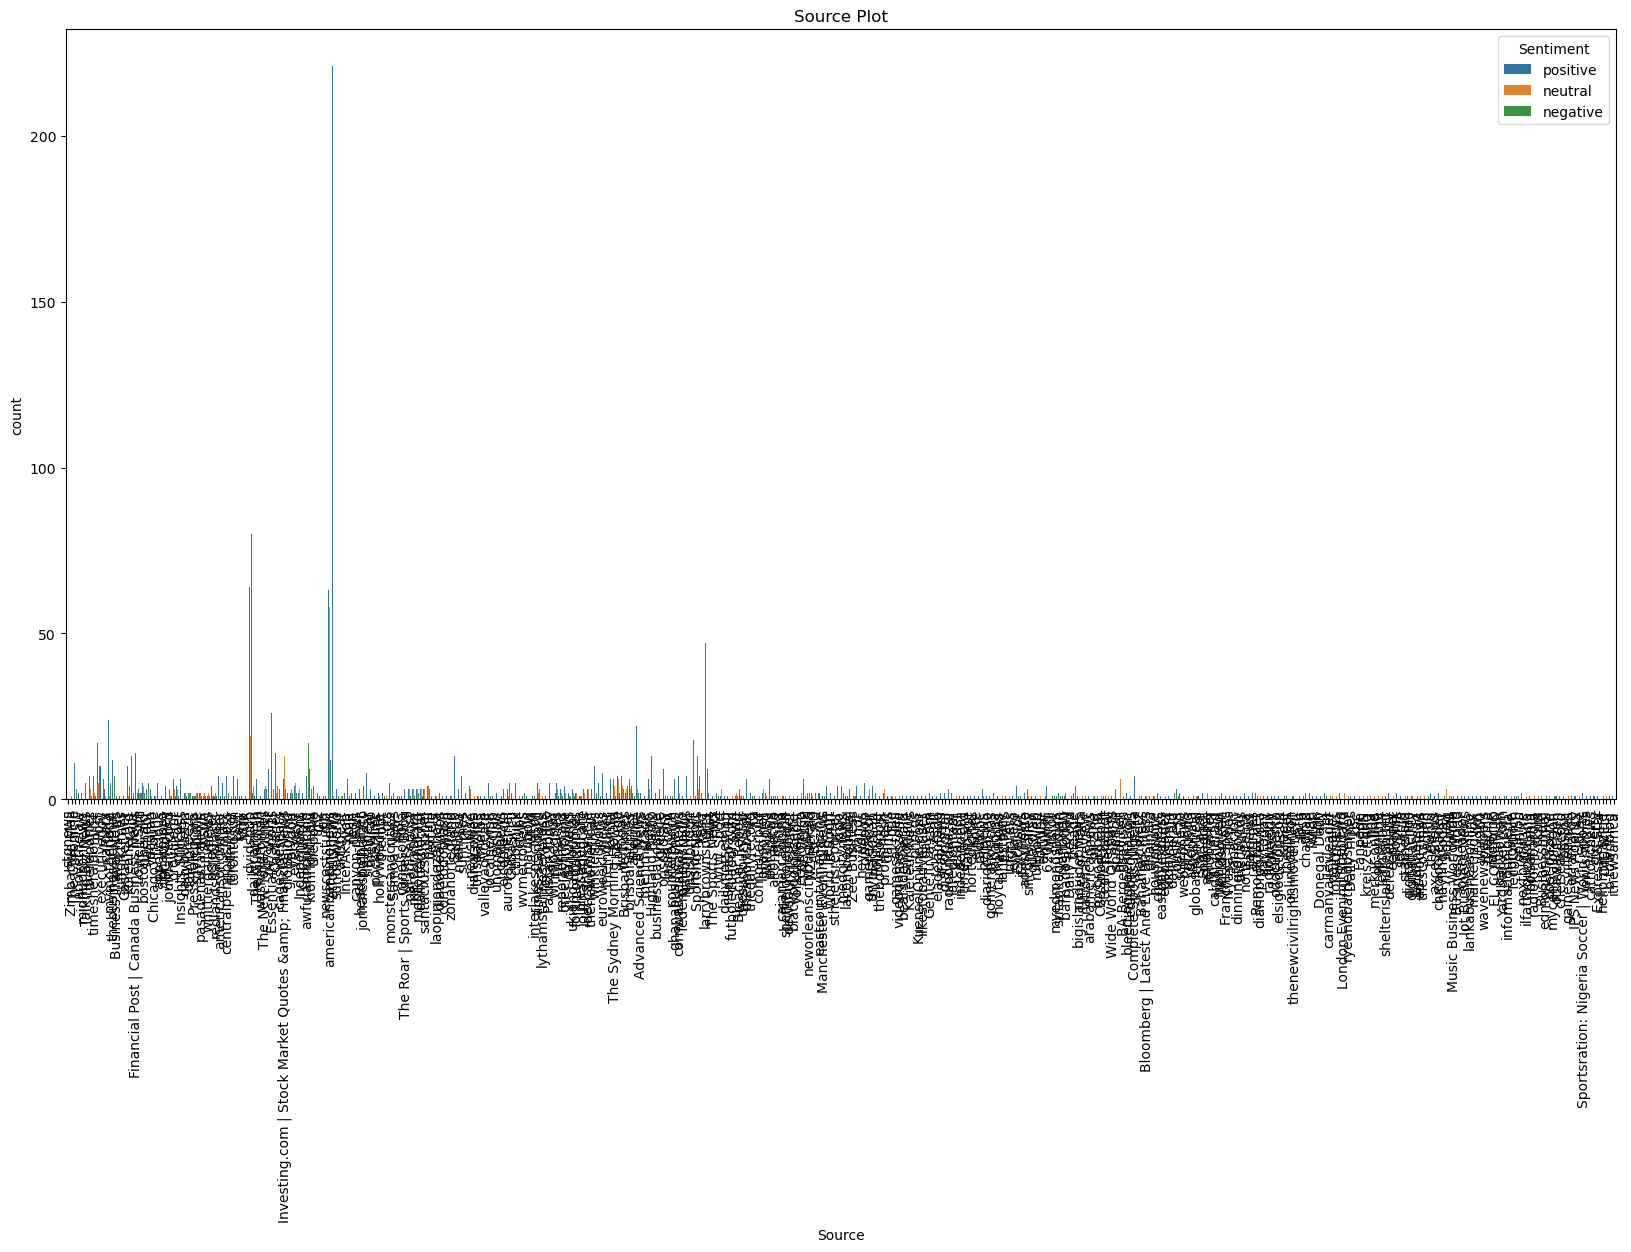

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='Source',data=df,hue='Sentiment')
plt.title('Source Plot')
plt.xlabel('Source')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### SENTIMENT BY AUTHOR

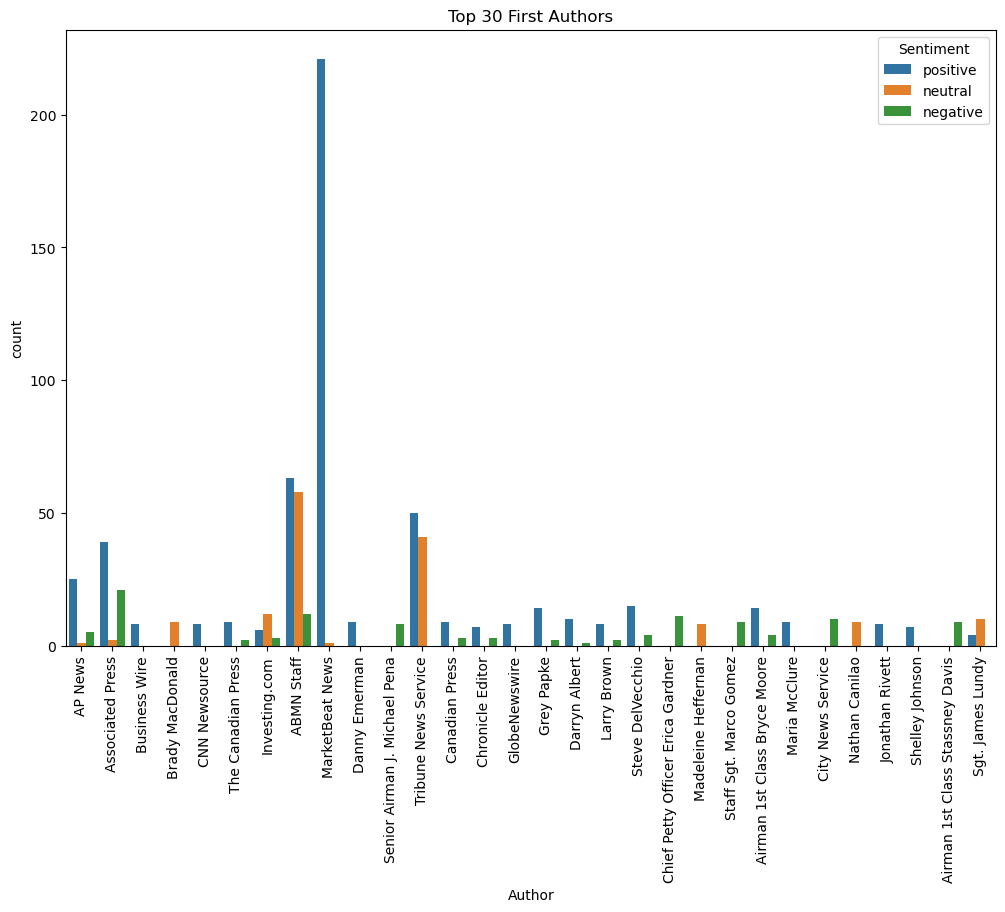

In [15]:
first_authors=df['Author'].value_counts().head(30).index
plt.figure(figsize=(12,8))
sns.countplot(x='Author',hue='Sentiment',data=df[df['Author'].isin(first_authors)])
plt.title('Top 30 First Authors')
plt.xticks(rotation=90)
plt.show()


### TYPE BY SENTIMENT


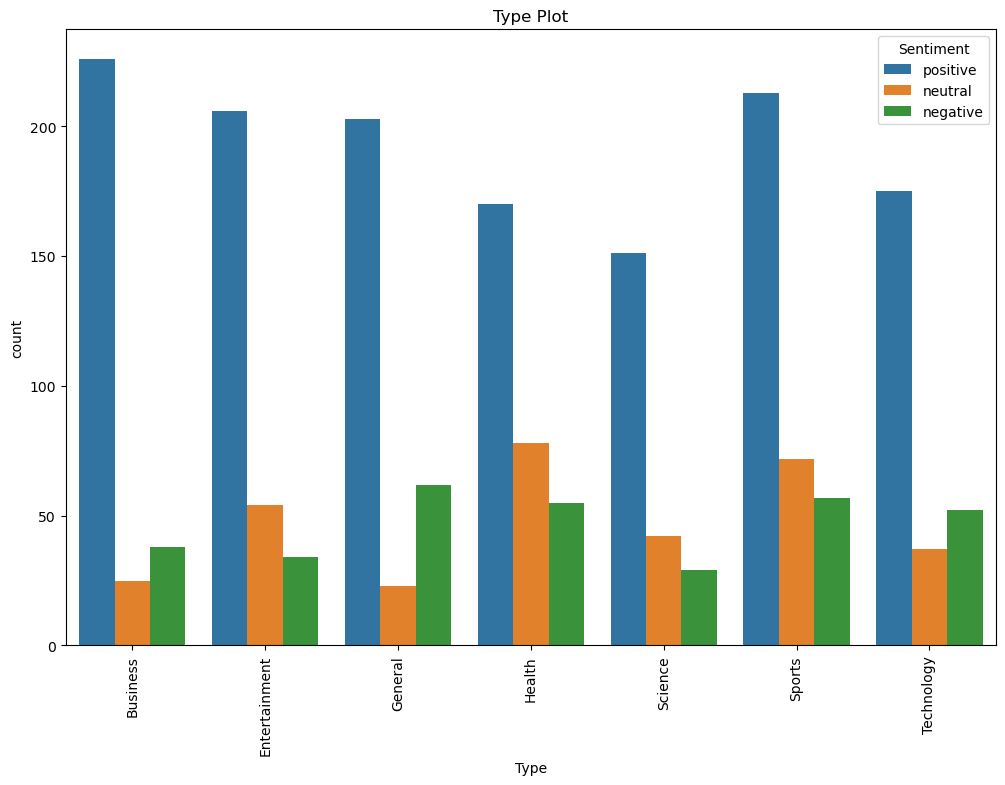

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='Type',hue='Sentiment',data=df)
plt.title('Type Plot')
plt.xticks(rotation=90)
plt.show()



### Text Length Description

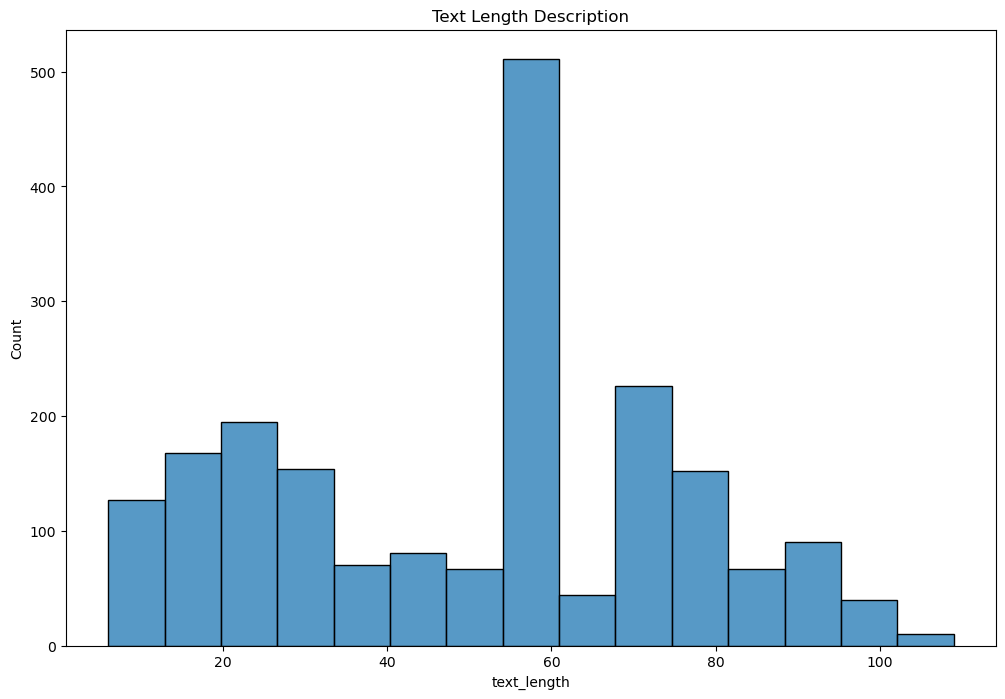

In [17]:
df['Description']=df['Description'].fillna(' ')
df['text_length']=df['Description'].apply(lambda x:len(x.split()))
plt.figure(figsize=(12,8))
sns.histplot(df,x="text_length",)
plt.title('Text Length Description')
plt.show()


### Data Preprocessing

In [18]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    
    return text

In [20]:
df['cleaned_Description']=df['Description'].apply(lambda x:preprocess_text(x))

In [21]:
df['cleaned_Description']=df['cleaned_Description'].astype(str)

texts=df['cleaned_Description']
labels=df['Sentiment'].replace({'negative':0,'neutral':1,'positive':2})

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Modeling

In [24]:
x=texts
y=labels

In [25]:
print(type(y))

<class 'pandas.core.series.Series'>


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [27]:
vectorizer=TfidfVectorizer()

x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)


In [28]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'MLP': MLPClassifier()
}


Logistic Regression Accuracy: 0.7920133111480865


              precision    recall  f1-score   support

           0       0.97      0.33      0.49        98
           1       0.94      0.44      0.60        99
           2       0.77      0.99      0.86       404

    accuracy                           0.79       601
   macro avg       0.89      0.59      0.65       601
weighted avg       0.83      0.79      0.76       601

Random Forest Accuracy: 0.8202995008319468


              precision    recall  f1-score   support

           0       1.00      0.41      0.58        98
           1       0.91      0.54      0.68        99
           2       0.80      0.99      0.88       404

    accuracy                           0.82       601
   macro avg       0.90      0.64      0.71       601
weighted avg       0.85      0.82      0.80       601

SVM Accuracy: 0.7953410981697171


              precision    recall  f1-score   support

           0       0.97      0.38      0.54        9

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7271214642262895


              precision    recall  f1-score   support

           0       0.48      0.30      0.36        98
           1       0.63      0.63      0.63        99
           2       0.78      0.86      0.82       404

    accuracy                           0.73       601
   macro avg       0.63      0.59      0.60       601
weighted avg       0.71      0.73      0.71       601

Gradient Boosting Accuracy: 0.8336106489184693


              precision    recall  f1-score   support

           0       0.82      0.48      0.61        98
           1       0.81      0.68      0.74        99
           2       0.84      0.96      0.89       404

    accuracy                           0.83       601
   macro avg       0.82      0.70      0.75       601
weighted avg       0.83      0.83      0.82       601

XGBoost Accuracy: 0.8452579034941764


              precision    recall  f1-score   support

           0       0.86      0.55      0.67        98
 

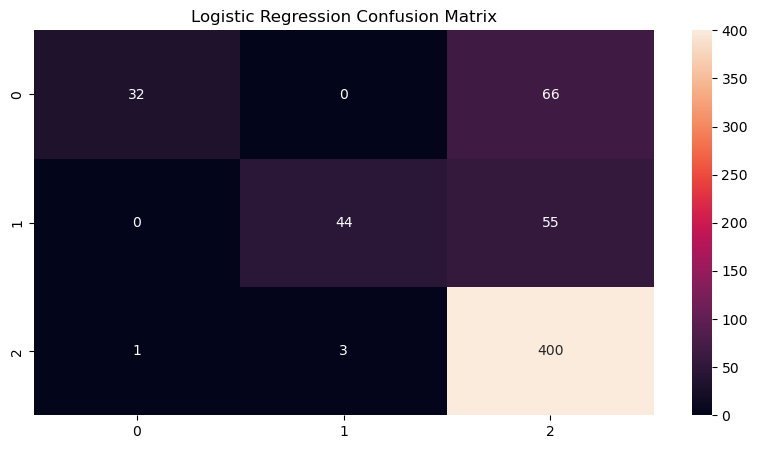

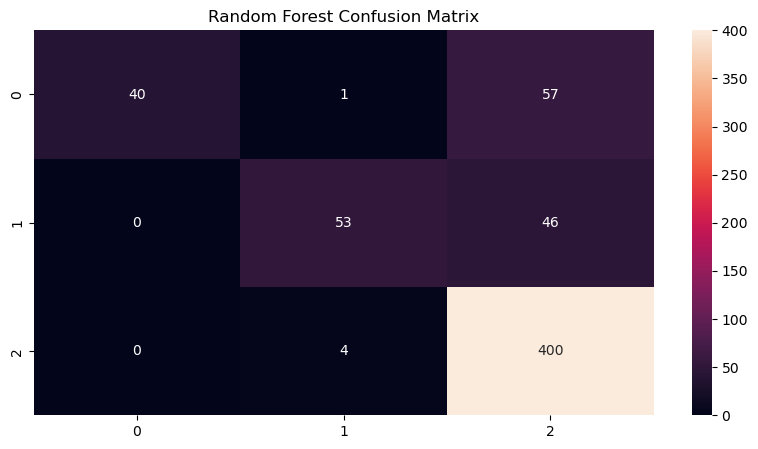

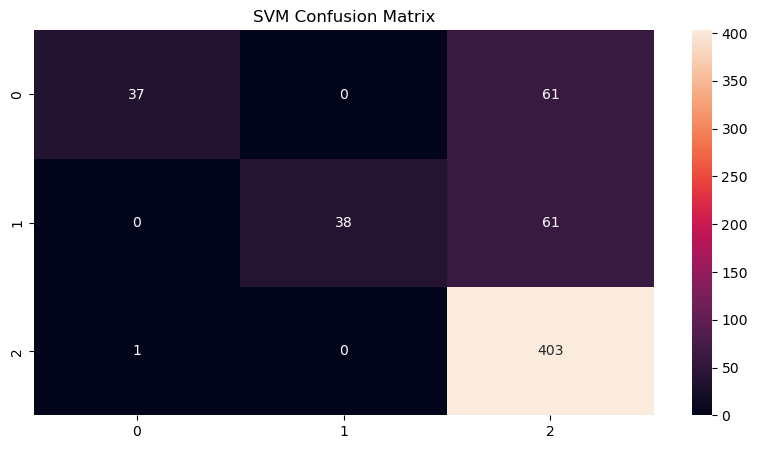

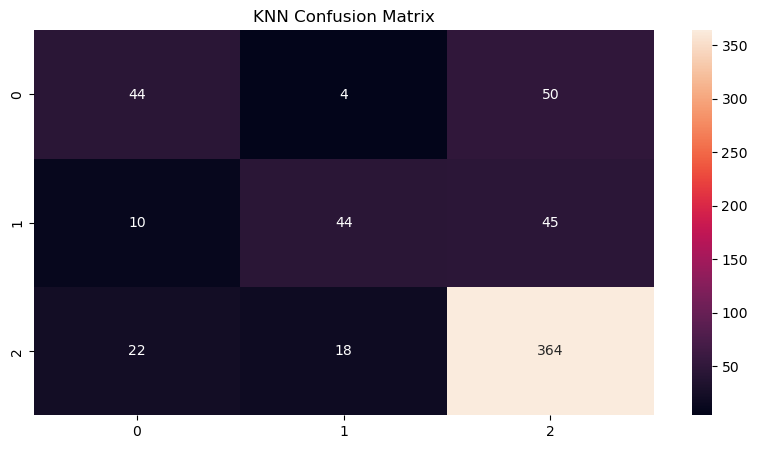

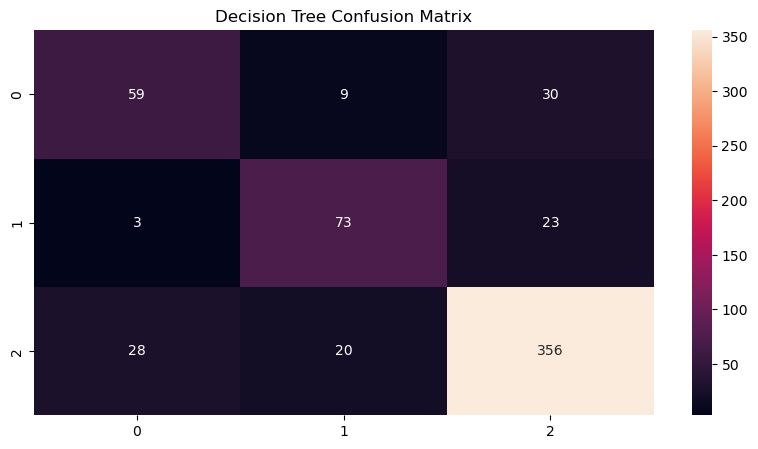

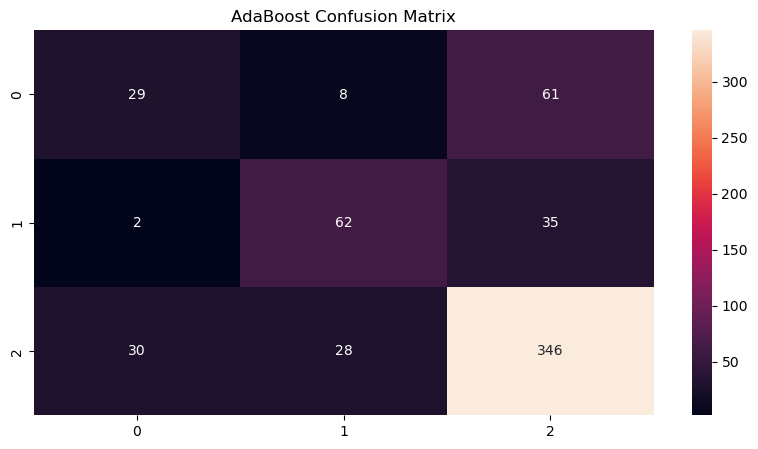

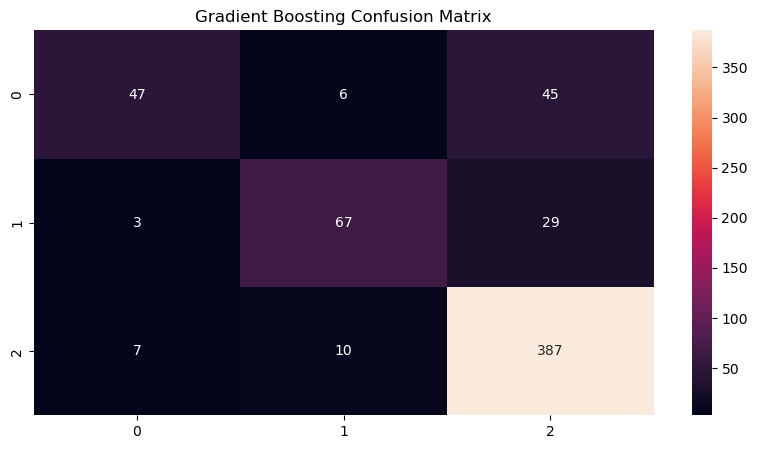

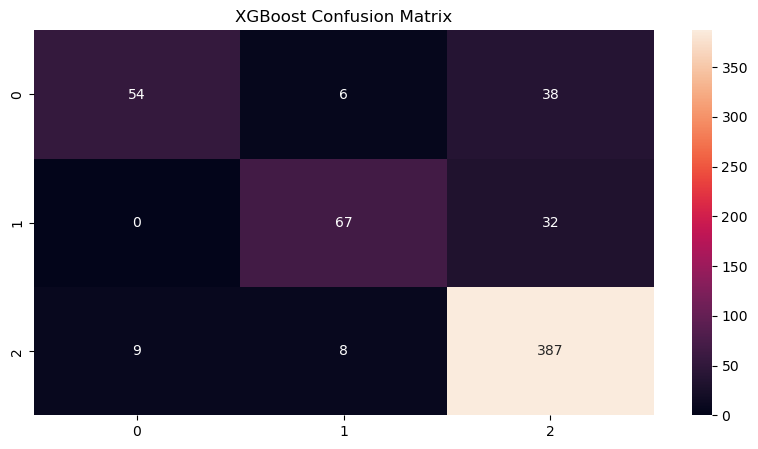

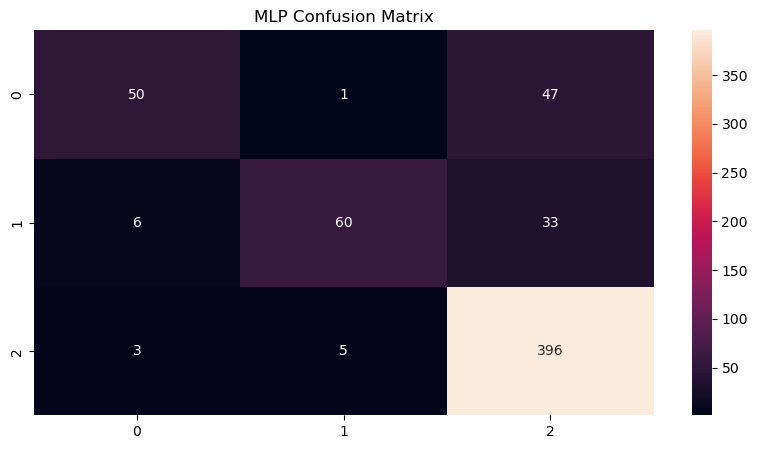

In [29]:
index=0
ac=[]

for classifier_name,classifier in classifiers.items():
    classifier.fit(x_train_vec,y_train)
    y_pred=classifier.predict(x_test_vec)

    accuracy=accuracy_score(y_test,y_pred)
    ac.append(accuracy)
    print(f'{classifier_name} Accuracy: {accuracy}')
    print("\n")
    print(classification_report(y_test,y_pred))

    plt.figure(figsize=(10,5))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
    plt.title(f'{classifier_name} Confusion Matrix')
    index+=1

In [30]:
accuracy_df=pd.DataFrame({'Model':list(classifiers.keys()),'Accuracy':ac})
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.792013
1,Random Forest,0.820300
2,SVM,0.795341
3,KNN,0.752080
4,Decision Tree,0.811980
5,AdaBoost,0.727121
6,Gradient Boosting,0.833611
7,XGBoost,0.845258
8,MLP,0.841930


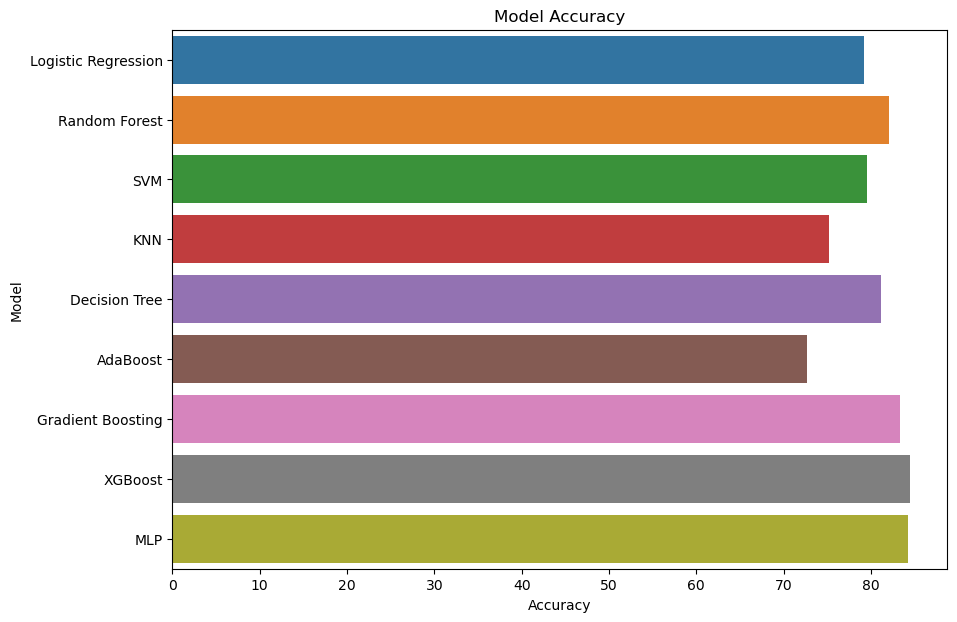

In [31]:
accuracy_df['Accuracy']=accuracy_df['Accuracy']*100
plt.figure(figsize=(10,7))
sns.barplot(x='Accuracy',y='Model',data=accuracy_df)
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()



In [ ]:
news = input("Enter a news article: ")
News=[news]

for classifier_name,classifier in classifiers.items():
    transformed_text=vectorizer.transform(News)
    predictions=classifier.predict(transformed_text)
    
    print(f"{classifier_name}:{predictions}")
    
    if predictions==2:
        print('positive')
    elif predictions==1:
        print("Neutral")
    elif predictions==0:
        print("Negative")
      
   
    
    